In [1]:
from net_class import cnn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

model = cnn()
model.load_state_dict(torch.load('models/cnn_clf.pth'))

<All keys matched successfully>

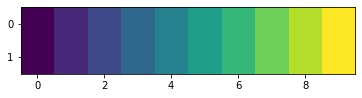

In [2]:
# COLOR MAP FOR REFERENCE

concat = np.concatenate((np.arange(0,10),np.arange(0,10))).reshape(2,10)
plt.imshow(concat)

with the above color mapping, we understand that the darker color represents a lower weight, while a brighter (yellower) color represents a higher weight
# visualizing the features for each layer:

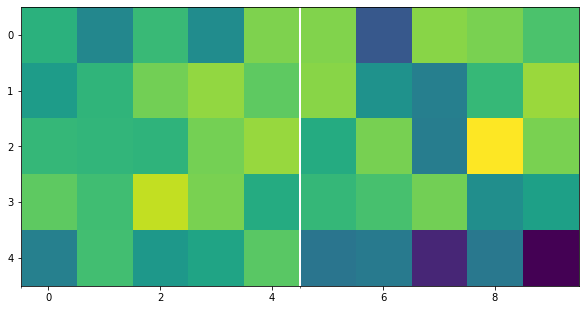

In [3]:
conv1 = model.c1.weight.detach().numpy()
c1 = np.reshape(conv1, (-1, 5, 5))

c1_cat = np.concatenate((c1[:]), axis=1)

plt.figure(figsize=(10,10))
plt.imshow(c1_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 5, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# first conv layer:

these features look pretty random, but we can sort of see a semicircle on the right of the first ceature, and some diagonal patterns on the right feature

(2, 2, 5, 5)


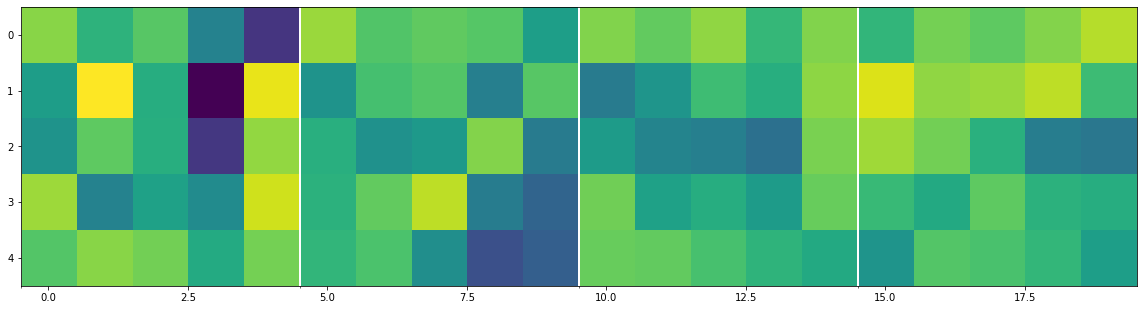

In [4]:
conv2 = model.c2.weight.detach().numpy()
print(conv2.shape)
c2 = np.reshape(conv2, (-1, 5, 5))

c2_cat = np.concatenate((c2[:]), axis=1)

plt.figure(figsize=(20, 20))
plt.imshow(c2_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 15, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


# second conv layer:

we can see that some patterns emerge from some of these features, the second and last one obviously detects some sort of diagonal, although the other ones still look somewhat random
# And finally, the weights for the linear layer
each row represents the array of weights for each output class

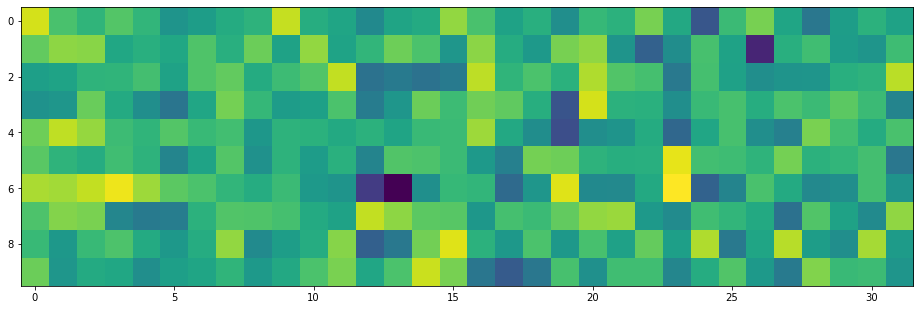

In [5]:
l1 = model.l1.weight.detach().numpy()
plt.figure(figsize=(16,16))
plt.imshow(l1)

ok all of these look really random
# let's push a handwritten '0' through the convnet and see what it looks like at each stage

In [6]:
# load the test set:
X_test = np.load('data/X_train.npy', allow_pickle=True)
y_test = np.load('data/y_train.npy', allow_pickle=True)
X_test = torch.tensor(X_test).view(-1, 1, 28, 28).float()

In [7]:
# find some 0s
zero_loc = np.where(y_test == 0)

zero_loc

(array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),)

tensor([[  2.9906, -30.1224, -12.3038,  -7.2190, -12.7441,  -7.0560,  -9.3100,
         -12.7542,  -8.6868,  -9.0440]], grad_fn=<AddmmBackward>)


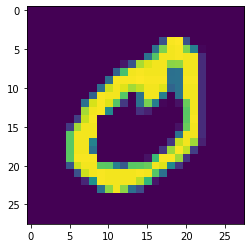

In [8]:
# see if the convnet identifies the first 0 correctly
zero = X_test[21].view(-1,1,28,28)
plt.imshow(zero[0][0])
print(model(zero))

wow! it's super confident it's a 0!! 
# visualizing the digit after the c1 layer:

(1, 2, 24, 24)


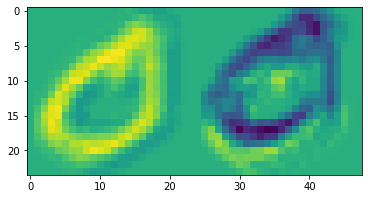

In [9]:
c1 = model.c1(zero)
c1 = c1.detach().numpy()
print(c1.shape)
c1 = c1.reshape((2,24,24))
c1_cat = np.concatenate((c1[:]), axis=1)
plt.imshow(c1_cat)

(1, 2, 8, 8)


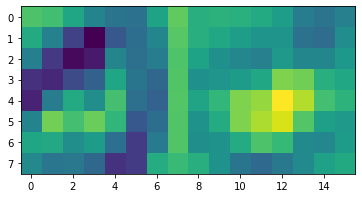

In [10]:
c2 = model.c2(F.max_pool2d(F.relu(model.c1(zero)), (2,2)))
c2 = c2.detach().numpy()
print(c2.shape)
c2 = c2.reshape((2,8,8))
c2_cat = np.concatenate((c2[:]), axis=1)
plt.imshow(c2_cat)

#  im kinda confused why its only 2 x 8 x 8 but ill figure it out later